In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pingouin as pg

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.outliers_influence as sms
from statsmodels.tools.tools import add_constant

from patsy.contrasts import ContrastMatrix
from patsy.contrasts import Poly
%matplotlib inline

In [2]:
data = pd.read_csv('Soya.csv')

In [15]:
data.groupby('Soya')['Sperm'].describe()

,count,mean,std,min,25%,50%,75%,max
Soya,,,,,,,,
1,20.0,4.986763,5.084368,0.351097,1.436837,3.095420,7.627433,21.08
2,20.0,4.605245,4.672629,0.325539,1.340831,2.595062,7.124869,18.47
3,20.0,4.110071,4.409910,0.402547,1.343861,2.942865,4.704491,18.21
4,20.0,1.653012,1.108649,0.310000,0.784204,1.332558,2.712103,4.11


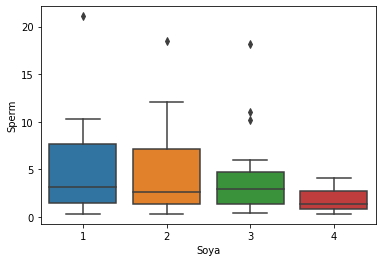

In [16]:
_ = sns.boxplot(x='Soya', y='Sperm', data=data)

In [17]:
data_1 = data[data['Soya']==1]
data_2 = data[data['Soya']==2]
data_3 = data[data['Soya']==3]
data_4 = data[data['Soya']==4]

In [18]:
stat, p = st.levene(data_1['Sperm'], data_2['Sperm'], data_3['Sperm'], data_4['Sperm'])
print(stat, p)

2.8600701279186134 0.042392388591743775


### Assumption of homogeneity of variances is violated. Clear from boxplots and levene tests.

In [19]:
st.shapiro(data['Sperm'])

(0.748501181602478, 2.1674956274253532e-10)

### normality assumption is also violated.

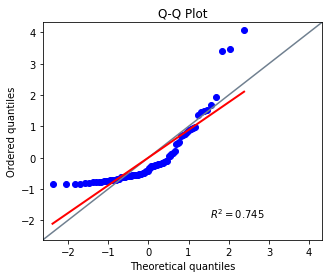

In [21]:
_ = pg.qqplot(data['Sperm'], confidence=False)

## Doing Normal Anova

In [22]:
m01 = ols('Sperm~C(Soya)', data=data).fit()
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sperm   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.636
Date:                Sat, 25 Jul 2020   Prob (F-statistic):             0.0558
Time:                        22:25:44   Log-Likelihood:                -225.00
No. Observations:                  80   AIC:                             458.0
Df Residuals:                      76   BIC:                             467.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.9868      0.924      5.395      0.000       3.146       6.828
C(Soya)[T.2]    -0.3815      1.307     -0.292      0.771      -2.985       2.222
C(Soya)[T.3]    -0.8767      1.307     -0.671      0.504      -3.480       1.727
C(Soya)[T.4]    -3.3338      1.307     -2.550      0.013      -5.937      -0.730
==============================================================================
Omnibus:                       43.844   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.581
Skew:                           1.904   Prob(JB):                     1.32e-25
Kurtosis:                       7.458   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### When doing normal anova it seems that the test is not significant at p=0.05

#### **The main ANOVA summary table shows us that because the observed significance value is greater  than  .05  we  can  say  that  there  was  no  significant  effect  of  soya  intake  on  men’s sperm count. This is strange because if you read Chapter 15 from where this example came, the Kruskal–Wallis test produced a significant result! The reason for this difference is that the data  violate  the  assumptions  of  normality  and  homogeneity  of  variance.  As  I  mention  in Chapter 15,  although  parametric  tests  have  more  power  to  detect  effects  when  their assumptions  are  met,  when  their  assumptions  are  violated  non-parametric  tests  have  more power! This example was arranged to prove this point: because the parametric assumptions are violated, the non-parametric tests produced a significant result and the parametric test did not because, in these circumstances, the non-parametric test has the greater power!**

## doing welch-f test

In [26]:
aov = pg.welch_anova(dv='Sperm', between='Soya', data=data)
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,Soya,3,34.657107,6.284439,0.001607,0.094234


#### **This output shows Welch’sF; note that the Welch test agrees with the non-parametric test in that  the  significance  of F is below the .05 threshold. However, in these circumstances, because  normality and homogeneity of variance have been violated we’d use a non-parametric test anyway!**

## Doing Robust anova , Kruskal-wallis

In [24]:
st.kruskal(data_1['Sperm'], data_2['Sperm'], data_3['Sperm'], data_4['Sperm'])

KruskalResult(statistic=8.658888888888868, pvalue=0.0341873601936127)

### It is significant when we do Robust anova. although  parametric  tests  have  more  power  to  detect  effects  when  their assumptions  are  met,  when  their  assumptions  are  violated  non-parametric  tests  have  more power! 